In [1]:
import plotly.express as px
import numpy as np
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
SEED = 4
np.random.seed(SEED)

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


# Fato curioso: Ao mudarmos o valor da seed, consequentemente alteramos a distribuição do train_test_split e do treinamento dos modelose isto causa uma mudança drástica de acerto dos modelos, por que? O resultado do modelo deveria ser independente da distribuição dos dados

In [2]:
data = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')

In [3]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# Verificando outliers
px.box(data, x = 'age', color='output')

In [6]:
px.box(data, x = 'trtbps', color='output')

In [7]:
px.box(data, x = 'chol', color='output')

In [8]:
px.box(data, x = 'thalachh', color='output')

In [9]:
px.box(data, x = 'oldpeak', color='output')

In [10]:
# Separando os inputs da variável alvo (x, y)
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [11]:
x.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [12]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

In [13]:
# Splitando os dados em variáveis de treino e teste.
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y)


In [14]:
# Verificando a proporção entre as labels do teste e do treino
print(y_train.value_counts())
print(y_test.value_counts())

output
1    124
0    103
Name: count, dtype: int64
output
1    41
0    35
Name: count, dtype: int64


In [15]:
# Treinando o modelo com Dummy
dummy = DummyClassifier()
dummy.fit(x_train, y_train)

DummyClassifier()

In [16]:
# Porcentagem de acerto do modelo Dummy
print(f'Acurácia do Dummy: {dummy.score(x_test, y_test)}')

Acurácia do Dummy: 0.5394736842105263


In [17]:
# Treinando o modelo com árvore de decisão
arvore = DecisionTreeClassifier (max_depth = 3)
arvore.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [18]:
# Porcentagem de acerto do modelo árvore de decisão
print(f'Acurácia da árvore: {arvore.score(x_test, y_test)}')

Acurácia da árvore: 0.868421052631579


[Text(0.5, 0.875, 'cp <= 0.5\ngini = 0.496\nsamples = 227\nvalue = [103, 124]\nclass = sim'),
 Text(0.25, 0.625, 'caa <= 0.5\ngini = 0.407\nsamples = 109\nvalue = [78, 31]\nclass = nao'),
 Text(0.125, 0.375, 'thall <= 2.5\ngini = 0.499\nsamples = 50\nvalue = [24, 26]\nclass = sim'),
 Text(0.0625, 0.125, 'gini = 0.375\nsamples = 28\nvalue = [7, 21]\nclass = sim'),
 Text(0.1875, 0.125, 'gini = 0.351\nsamples = 22\nvalue = [17, 5]\nclass = nao'),
 Text(0.375, 0.375, 'trtbps <= 109.0\ngini = 0.155\nsamples = 59\nvalue = [54, 5]\nclass = nao'),
 Text(0.3125, 0.125, 'gini = 0.48\nsamples = 5\nvalue = [3, 2]\nclass = nao'),
 Text(0.4375, 0.125, 'gini = 0.105\nsamples = 54\nvalue = [51, 3]\nclass = nao'),
 Text(0.75, 0.625, 'slp <= 1.5\ngini = 0.334\nsamples = 118\nvalue = [25, 93]\nclass = sim'),
 Text(0.625, 0.375, 'caa <= 0.5\ngini = 0.475\nsamples = 49\nvalue = [19, 30]\nclass = sim'),
 Text(0.5625, 0.125, 'gini = 0.342\nsamples = 32\nvalue = [7, 25]\nclass = sim'),
 Text(0.6875, 0.125, 'g

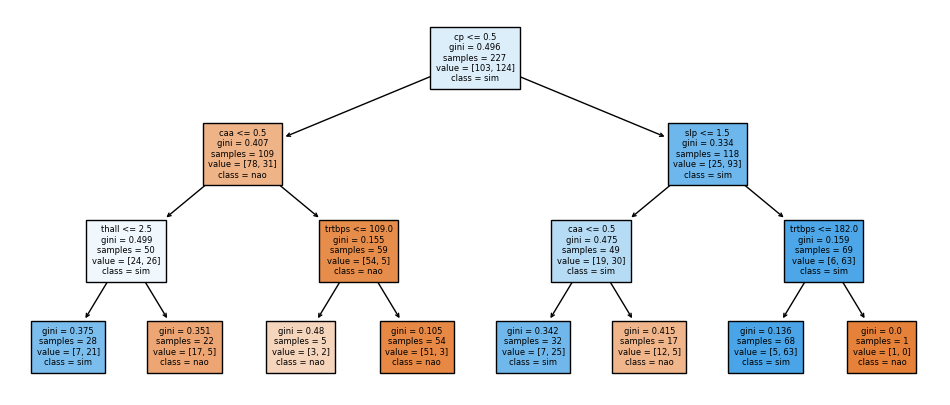

In [19]:
# Visualizando as camadas da nossa árvore de decisão
features = x.columns
plt.figure(figsize = (12, 5))
plot_tree(arvore, filled = True, feature_names = features, class_names = ['nao', 'sim'], fontsize = 6)

In [20]:
# Normalizando os dados para que não haja viés nas informações por causa da discrepância entre os valores numéricos
normalizacao = MinMaxScaler()
x_treino_normalizado = normalizacao.fit_transform(x_train)

pd.DataFrame(x_treino_normalizado)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.333333,1.0,0.000000,0.163265,0.162100,0.0,0.0,0.809160,0.0,0.000000,1.0,0.25,0.666667
1,0.133333,1.0,0.000000,0.265306,0.164384,0.0,0.5,0.450382,1.0,0.258065,0.5,0.00,1.000000
2,0.911111,1.0,0.000000,0.520408,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.0,0.00,1.000000
3,0.333333,1.0,0.666667,0.469388,0.248858,0.0,0.0,0.832061,0.0,0.000000,1.0,0.00,0.666667
4,0.911111,1.0,0.333333,0.632653,0.271689,0.0,0.0,0.549618,0.0,0.000000,1.0,0.00,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,0.911111,1.0,0.666667,0.673469,0.326484,0.0,0.5,0.312977,1.0,0.467742,0.5,0.25,1.000000
223,0.355556,1.0,0.000000,0.489796,0.417808,0.0,0.0,0.580153,1.0,0.000000,0.5,0.75,1.000000
224,0.644444,1.0,0.666667,0.469388,0.194064,1.0,0.0,0.717557,0.0,0.000000,1.0,0.00,0.666667
225,0.733333,0.0,0.000000,0.673469,0.086758,0.0,0.0,0.564885,0.0,1.000000,0.0,0.75,1.000000


In [21]:
# Treinando o modelo com o KNN
knn = KNeighborsClassifier()

knn.fit(x_treino_normalizado, y_train)

KNeighborsClassifier()

In [22]:
# Testando o score do modelo
x_teste_normalizado = normalizacao.transform(x_test)

print(f'Acurácia do Dummy: {knn.score(x_teste_normalizado, y_test)}')

Acurácia do Dummy: 0.8157894736842105


In [23]:
linearsvc = LinearSVC()

linearsvc.fit(x_train, y_train)


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



LinearSVC()

In [24]:
print(f'Acurácia do LinearSVC: {linearsvc.score(x_test, y_test)}')

Acurácia do LinearSVC: 0.5394736842105263


In [25]:
# Mostrando a acurácia dos modelos
print(f'A acurácia do modelo Dummy é: {dummy.score(x_test, y_test)}')
print(f'A acurácia do modelo Árvore é: {arvore.score(x_test, y_test)}')
print(f'A acurácia do modelo KNN é: {knn.score(x_teste_normalizado, y_test)}')
print(f'A acurácia do modelo LinearSVC é: {linearsvc.score(x_test, y_test)}')

A acurácia do modelo Dummy é: 0.5394736842105263
A acurácia do modelo Árvore é: 0.868421052631579
A acurácia do modelo KNN é: 0.8157894736842105
A acurácia do modelo LinearSVC é: 0.5394736842105263
